In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

movies_df = pd.read_csv('../Dataset/IMDb movies.csv')
ratings_df = pd.read_csv('../Dataset/IMDb ratings.csv')

C:\Users\abhis\AppData\Local\Temp\ipykernel_20652\529642957.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('../Dataset/IMDb movies.csv')


## __MERGIND DATASETS__

In [2]:
print("Movies Dataset shape:", movies_df.shape)
print("Ratings Dataset shape:", ratings_df.shape)

print("\nMovies columns:\n", movies_df.columns)
print("\nRatings columns:\n", ratings_df.columns)


Movies Dataset shape: (85855, 22)
Ratings Dataset shape: (85855, 49)

Movies columns:
 Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

Ratings columns:
 Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes',

In [3]:
print("Nulls in imdb_title_id (Movies):", movies_df['imdb_title_id'].isnull().sum())
print("Duplicates in imdb_title_id (Movies):", movies_df['imdb_title_id'].duplicated().sum())

print("Nulls in imdb_title_id (Ratings):", ratings_df['imdb_title_id'].isnull().sum())
print("Duplicates in imdb_title_id (Ratings):", ratings_df['imdb_title_id'].duplicated().sum())


Nulls in imdb_title_id (Movies): 0
Duplicates in imdb_title_id (Movies): 0
Nulls in imdb_title_id (Ratings): 0
Duplicates in imdb_title_id (Ratings): 0


In [4]:
merged_df = pd.merge(movies_df, ratings_df, on='imdb_title_id', how='inner')

print("Merged Dataset shape:", merged_df.shape)
print("\nMerged Dataset head:\n", merged_df.head())

Merged Dataset shape: (85855, 70)

Merged Dataset head:
   imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Ita

## __BACKUP DATA__

In [5]:
merged_backup = merged_df.copy()


## __HANDLING MISSING DATA__

### Missing data

In [6]:
missing_values = merged_df.isnull().sum().sort_values(ascending=False)

missing_values[missing_values > 0]

metascore                    72550
usa_gross_income             70529
females_0age_avg_vote        63738
females_0age_votes           63738
budget                       62145
males_0age_avg_vote          58444
males_0age_votes             58444
worlwide_gross_income        54839
allgenders_0age_votes        52496
allgenders_0age_avg_vote     52496
reviews_from_critics         11797
reviews_from_users            7597
females_18age_votes           6521
females_18age_avg_vote        6521
production_company            4455
females_45age_votes           2798
females_45age_avg_vote        2798
description                   2115
writer                        1572
males_18age_votes             1465
males_18age_avg_vote          1465
females_30age_votes            944
females_30age_avg_vote         944
language                       901
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
top1000_voters_rating          679
top1000_voters_votes           679
us_voters_rating    

### Visualizing misingness

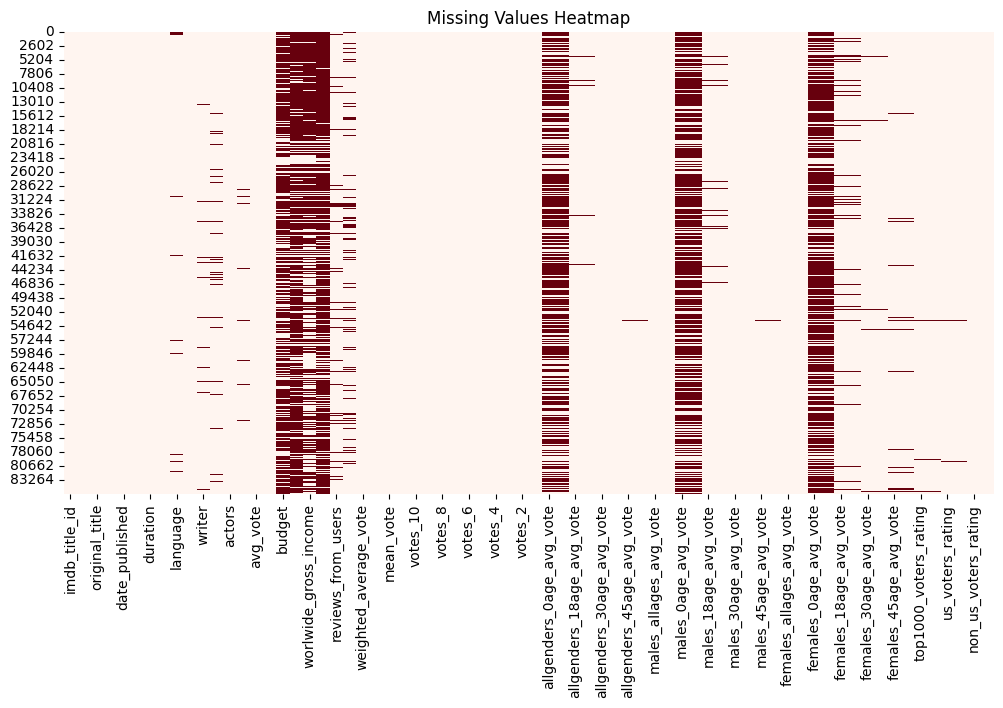

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
merged_df.dtypes

imdb_title_id            object
title                    object
original_title           object
year                     object
date_published           object
                         ...   
top1000_voters_votes    float64
us_voters_rating        float64
us_voters_votes         float64
non_us_voters_rating    float64
non_us_voters_votes     float64
Length: 70, dtype: object

### __Dropping columns with missingnees more than 70%__

In [9]:
# Drop columns with more than 70% missing
threshold = 0.7  
missing_ratio = merged_df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
print("Dropping columns:", cols_to_drop)

merged_df.drop(columns=cols_to_drop, inplace=True)

Dropping columns: ['budget', 'usa_gross_income', 'metascore', 'females_0age_avg_vote', 'females_0age_votes']


In [10]:
merged_df.shape

(85855, 65)

### __Filling missing value in numerical data with median__


In [11]:
# fill empty numerical columns with median
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if merged_df[col].isnull().any():
        median_val = merged_df[col].median()
        merged_df[col].fillna(median_val, inplace=True)


C:\Users\abhis\AppData\Local\Temp\ipykernel_20652\2738578571.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(median_val, inplace=True)
C:\Users\abhis\AppData\Local\Temp\ipykernel_20652\2738578571.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [12]:
# Check for any remaining nulls in numerical columns
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
nulls_in_num = merged_df[num_cols].isnull().sum()

print(nulls_in_num[nulls_in_num > 0]) 

Series([], dtype: int64)


### Handle the missingness in categorical data

In [13]:
#Fill with unknown for categorical columns
cat_cols = merged_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if merged_df[col].isnull().sum() > 0:
        merged_df[col].fillna('unknown', inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_20652\3753543134.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna('unknown', inplace=True)


In [14]:
# Check for any remaining nulls in categorical columns
cat_cols = merged_df.select_dtypes(include=['object']).columns
nulls_in_cat = merged_df[cat_cols].isnull().sum()

print(merged_df[cat_cols].isnull().sum()) 

imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
worlwide_gross_income    0
dtype: int64


## __DATA TYPE CONVERSION__

converting date publised to date format

In [15]:
merged_df['date_published'] = pd.to_datetime(merged_df['date_published'], errors='coerce')

print(merged_df['date_published'])

0       1894-10-09
1       1906-12-26
2       1911-08-19
3       1912-11-13
4       1911-03-06
           ...    
85850   2020-01-29
85851   2020-02-13
85852   2019-03-08
85853   2019-03-15
85854   2020-02-05
Name: date_published, Length: 85855, dtype: datetime64[ns]


In [16]:
merged_df = merged_df[~merged_df['date_published'].isnull()]
print("Remaining nulls in date_published:", merged_df['date_published'].isnull().sum())

Remaining nulls in date_published: 0


Convert year to Integer

In [17]:
merged_df['year'] = pd.to_numeric(merged_df['year'], errors='coerce').astype('Int64')
print(merged_df['year'])

0        1894
1        1906
2        1911
3        1912
4        1911
         ... 
85850    2020
85851    2020
85852    2019
85853    2019
85854    2019
Name: year, Length: 81292, dtype: Int64


Clean and Convert Monetary Column

In [18]:
merged_df['worlwide_gross_income'] = merged_df['worlwide_gross_income'].astype(str).str.lower()

merged_df = merged_df[~merged_df['worlwide_gross_income'].isin(['unknown', 'nan', 'none'])]

def fix_value(value):
    try:
        value = value.replace('$', '').replace(',', '').strip()
        return float(value) if value else None
    except:
        return None

merged_df['worlwide_gross_income'] = merged_df['worlwide_gross_income'].apply(fix_value)

merged_df = merged_df[~merged_df['worlwide_gross_income'].isnull()]

print(merged_df['worlwide_gross_income'].head())
print("\nRemaining nulls:", merged_df['worlwide_gross_income'].isnull().sum())
print(merged_df.shape)


79      144968.0
165       8811.0
210       4272.0
222     772155.0
245    9183673.0
Name: worlwide_gross_income, dtype: float64

Remaining nulls: 0
(30731, 65)


## __Extra Analytical Features__

In [19]:
print(merged_df.columns.tolist())


['imdb_title_id', 'title', 'original_title', 'year', 'date_published', 'genre', 'duration', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'avg_vote', 'votes', 'worlwide_gross_income', 'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1', 'allgenders_0age_avg_vote', 'allgenders_0age_votes', 'allgenders_18age_avg_vote', 'allgenders_18age_votes', 'allgenders_30age_avg_vote', 'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes', 'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote', 'females_allages_votes', 'females_18age_avg_vote', 'females_18age_votes'

### Extract Year, Month from date_published

In [20]:
merged_df['release_year'] = merged_df['date_published'].dt.year
merged_df['release_month'] = merged_df['date_published'].dt.month

print(merged_df[['release_year', 'release_month']].head())

     release_year  release_month
79           1916              4
165          1920              2
210          1921             12
222          1920              1
245          1923              4


### Create a Revenue Column

In [21]:
merged_df['revenue'] = merged_df['worlwide_gross_income']

### Convert genres of movie into list

In [22]:
# Convert genre to list
def split_genres(genre):
    if pd.isna(genre):
        return []
    return [genre.strip() for genre in genre.split(',') if genre.strip()]  

merged_df['genre_list'] = merged_df['genre'].apply(split_genres)

#count no of genres
merged_df['num_genres'] = merged_df['genre_list'].apply(len)

# show result
print(merged_df[['genre_list','num_genres']].head())

                     genre_list  num_genres
79     [Drama, Fantasy, Horror]           3
165  [Fantasy, Horror, Mystery]           3
210                     [Drama]           1
222    [Comedy, Drama, Romance]           3
245       [Drama, Romance, War]           3


# __ONE HOT ENCODING CATEGORICAL DATA__

### One-Hot Encoding for Single-label Columns

In [23]:
#find the unique data in countr,language,director,writer,star
def find_unique_values(column):
    unique_values = merged_df[column].unique()
    return unique_values[~pd.isnull(unique_values)]

unique_countries = find_unique_values('country')
unique_languages = find_unique_values('language')   
unique_directors = find_unique_values('director')
unique_writers = find_unique_values('writer')

print(len(unique_countries), len(unique_directors), len(unique_writers), len(unique_languages))

3189 14974 25058 3018


In [24]:
# Number of top entries to display
top_n = 200

columns = ['country', 'language', 'director', 'writer']

for col in columns:
    print(f"\nTop {top_n} most frequent values in '{col}':")
    print(merged_df[col].value_counts().head(top_n))



Top 200 most frequent values in 'country':
country
USA                            7641
India                          1736
France                         1441
Japan                          1206
UK                              944
                               ... 
UK, USA, Germany                  7
France, Italy, Germany            7
France, Germany, UK               7
Belgium, Luxembourg, France       7
France, Israel                    7
Name: count, Length: 200, dtype: int64

Top 200 most frequent values in 'language':
language
English                      10003
French                        1667
Spanish                       1275
Japanese                      1099
Italian                        745
                             ...  
Dutch, German                    7
Italian, Spanish                 7
English, Arabic, French          7
Dutch, English, French           7
English, Spanish, Russian        7
Name: count, Length: 200, dtype: int64

Top 200 most frequent values in 'd

In [25]:
top_n = 200

for col in ['country', 'language', 'director', 'writer']:
    top_categories = merged_df[col].value_counts().head(top_n).index
    merged_df[col] = merged_df[col].apply(lambda x: x if x in top_categories else 'Other')

print("\nUnique values after grouping:")
for col in ['country', 'language', 'director', 'writer']:
    print(f"Unique values in '{col}': {merged_df[col].unique()}")



Unique values after grouping:
Unique values in 'country': ['Russia' 'Germany' 'Norway' 'USA' 'Soviet Union' 'UK' 'France' 'Other'
 'Germany, France' 'Japan' 'USA, UK' 'Italy' 'USA, Mexico' 'France, Italy'
 'UK, USA' 'Mexico' 'Sweden' 'Italy, France' 'Denmark' 'Italy, USA'
 'India' 'Poland' 'France, Japan' 'Spain, Mexico' 'Brazil' 'Spain, France'
 'USA, India' 'Spain, USA' 'West Germany' 'UK, Italy' 'Italy, Spain'
 'France, Belgium' 'USA, Italy' 'Spain, Italy' 'Spain' 'Mexico, USA'
 'Hong Kong, USA' 'France, USA' 'Finland' 'USA, Canada'
 'Hong Kong, Taiwan' 'Australia' 'France, Spain' 'Hong Kong' 'Japan, USA'
 'USA, Netherlands' 'West Germany, USA' 'Hungary' 'Canada, USA'
 'Australia, USA' 'Canada' 'USA, Hong Kong' 'UK, France'
 'Spain, Argentina' 'France, Canada' 'USA, UK, Canada' 'Australia, UK'
 'Canada, France' 'Netherlands' 'USA, Japan' 'UK, India'
 'South Korea, USA' 'New Zealand, USA' 'USA, France' 'USA, Australia'
 'Philippines' 'USA, Argentina' 'UK, Canada, USA' 'Argentina'
 '

In [26]:
encoded_df = pd.get_dummies(merged_df, columns=['country', 'language', 'director', 'writer'], drop_first=True)
print("Encoded DataFrame shape:", encoded_df.shape)
encoded_df.head()


Encoded DataFrame shape: (30731, 866)


,imdb_title_id,title,original_title,year,date_published,genre,duration,production_company,actors,description,...,writer_Tyler Perry,"writer_Tyler Perry, Tyler Perry",writer_Werner Herzog,writer_William Shakespeare,writer_Woody Allen,writer_Yilmaz Erdogan,writer_Youssef Maaty,writer_unknown,writer_Çagan Irmak,writer_Éric Rohmer
79,tt0007183,Pikovaya dama,Pikovaya dama,1916,1916-04-01,"Drama, Fantasy, Horror",63,unknown,"Tamara Duvan, Ivan Mozzhukhin, Vera Orlova, Ni...","While hosting a game of cards one night, Narum...",...,False,False,False,False,False,False,False,False,False,False
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",...,False,False,False,False,False,False,False,False,False,False
210,tt0011440,Markens grøde,Markens grøde,1921,1921-12-02,Drama,107,Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",After the Nobel prize winning Knut Hamsun-nove...,...,False,False,False,False,False,False,False,False,False,False
222,tt0011741,Suds,Suds,1920,1920-01-27,"Comedy, Drama, Romance",75,Mary Pickford Company,"Mary Pickford, Albert Austin, Harold Goodwin, ...",A London laundress attempts to rise above her ...,...,False,False,False,False,False,False,False,False,False,False
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,...,False,False,False,False,False,False,False,False,False,False


###     One hot encoding for genres

In [27]:
unique_genre_lists = merged_df['genre_list'].apply(tuple).unique()
print(len(unique_genre_lists))

717


In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

genre_encoded = mlb.fit_transform(merged_df['genre_list'])

genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

merged_df = pd.concat([merged_df.drop('genre_list', axis=1), genre_df], axis=1)


In [29]:
print("Genre One-Hot Encoded Shape:", genre_df.shape)
print("Genres Encoded:", genre_df.columns.tolist())

Genre One-Hot Encoded Shape: (30731, 22)
Genres Encoded: ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [30]:
print(genre_df.head())

   Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0       0          0          0          0       0      0            0      1   
1       0          0          0          0       0      0            0      0   
2       0          0          0          0       0      0            0      1   
3       0          0          0          0       1      0            0      1   
4       0          0          0          0       0      0            0      1   

   Family  Fantasy  ...  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
0       0        1  ...       1      0        0        0        0       0   
1       0        1  ...       1      0        0        1        0       0   
2       0        0  ...       0      0        0        0        0       0   
3       0        0  ...       0      0        0        0        1       0   
4       0        0  ...       0      0        0        0        1       0   

   Sport  Thriller  War  Western  
0      0       

In [31]:
print(genre_df.sum().sort_values(ascending=False))

Drama          18033
Comedy         11971
Romance         5537
Action          4882
Crime           4124
Thriller        3896
Adventure       3023
Horror          2374
Mystery         1919
Family          1633
Fantasy         1537
Biography       1337
Animation       1320
Sci-Fi          1044
History          951
Music            771
War              594
Sport            546
Musical          393
Western          158
Film-Noir         34
Documentary        1
dtype: int64


In [32]:

encoded_df = encoded_df.reset_index(drop=True)
genre_df = genre_df.reset_index(drop=True)
# Now merge safely
final_encoded_df = pd.concat([encoded_df, genre_df], axis=1)
final_encoded_df.drop(columns=['genre'], inplace=True)

print("Final Encoded DataFrame shape:", final_encoded_df.shape)
print(final_encoded_df.head())

Final Encoded DataFrame shape: (30731, 887)
  imdb_title_id                                title  \
0     tt0007183                        Pikovaya dama   
1     tt0010323     Il gabinetto del dottor Caligari   
2     tt0011440                        Markens grøde   
3     tt0011741                                 Suds   
4     tt0012190  I quattro cavalieri dell'Apocalisse   

                        original_title  year date_published  duration  \
0                        Pikovaya dama  1916     1916-04-01        63   
1         Das Cabinet des Dr. Caligari  1920     1920-02-27        76   
2                        Markens grøde  1921     1921-12-02       107   
3                                 Suds  1920     1920-01-27        75   
4  The Four Horsemen of the Apocalypse  1921     1923-04-16       150   

           production_company  \
0                     unknown   
1            Decla-Bioscop AG   
2             Christiana Film   
3       Mary Pickford Company   
4  Metro Pictur

The genre feature was treated as a multi-label categorical variable since a single movie can belong to multiple genres (e.g., Action, Thriller). To handle this, the genre strings were split into individual labels and one-hot encoded using MultiLabelBinarizer. This created binary columns for each unique genre (e.g., Action, Drama, Comedy), allowing the model to capture the genre profile of each film without introducing unnecessary dimensionality.

## __Scaling for Numerical Columns__

In [33]:
final_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30731 entries, 0 to 30730
Columns: 887 entries, imdb_title_id to Western
dtypes: Int64(1), bool(800), datetime64[ns](1), float64(40), int32(24), int64(14), object(7)
memory usage: 41.1+ MB


In [34]:
numerical_cols = final_encoded_df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols.tolist())


Numerical columns: ['year', 'duration', 'avg_vote', 'votes', 'worlwide_gross_income', 'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1', 'allgenders_0age_avg_vote', 'allgenders_0age_votes', 'allgenders_18age_avg_vote', 'allgenders_18age_votes', 'allgenders_30age_avg_vote', 'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes', 'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote', 'females_allages_votes', 'females_18age_avg_vote', 'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes', 'females_45age_avg_vote', 'females_45age_votes', 'top1000_voters_rating', 'top1000_voters_vot

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_values = scaler.fit_transform(final_encoded_df[numerical_cols])

scaled_df = pd.DataFrame(scaled_values, columns=numerical_cols)

final_encoded_df.drop(columns=numerical_cols, inplace=True)
final_encoded_df = pd.concat([final_encoded_df, scaled_df], axis=1)


In [36]:
print("Scaled Feature Preview (first 5 rows):")
print(scaled_df.head())

Scaled Feature Preview (first 5 rows):
       year  duration  avg_vote     votes  worlwide_gross_income  \
0 -7.191943 -2.074245  0.830045 -0.273478              -0.252752   
1 -6.873422 -1.435221  1.837500  0.355905              -0.254279   
2 -6.793791  0.088605  0.463698 -0.278228              -0.254330   
3 -6.873422 -1.484377  0.188937 -0.278056              -0.245713   
4 -6.793791  2.202300  1.013219 -0.245460              -0.151322   

   reviews_from_users  reviews_from_critics  weighted_average_vote  \
0           -0.310531             -0.542074               0.830045   
1            0.539268              1.323047               1.837500   
2           -0.325310             -0.566140               0.463698   
3           -0.303141             -0.590206               0.188937   
4           -0.170129             -0.409710               1.013219   

   total_votes  mean_vote  ...  females_45age_avg_vote  females_45age_votes  \
0    -0.273478   0.452649  ...                1.2946

All numerical features were standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1. This helps avoid bias during model training and ensures consistent feature contribution, especially in algorithms sensitive to feature scale (e.g., regression, k-NN, SVM). The scaled features include runtime (duration), user/critic engagement (votes, reviews), rating metrics (avg_vote, metascore), and financial performance (worldwide_revenue).

## __Final Dataset Check and Summary__

### Final shape and column

In [37]:
print("Final Dataset Shape:", final_encoded_df.shape)
print("Final Column List:", final_encoded_df.columns.tolist())

Final Dataset Shape: (30731, 887)
Final Column List: ['imdb_title_id', 'title', 'original_title', 'date_published', 'production_company', 'actors', 'description', 'release_year', 'release_month', 'genre_list', 'country_Argentina, France', 'country_Argentina, Mexico', 'country_Argentina, Spain', 'country_Australia', 'country_Australia, UK', 'country_Australia, USA', 'country_Austria', 'country_Austria, Germany', 'country_Belgium', 'country_Belgium, France', 'country_Belgium, Luxembourg, France', 'country_Belgium, Netherlands', 'country_Brazil', 'country_Brazil, France', 'country_Bulgaria', 'country_Canada', 'country_Canada, France', 'country_Canada, UK', 'country_Canada, USA', 'country_Canada, USA, UK', 'country_Chile', 'country_China', 'country_China, France', 'country_China, Hong Kong', 'country_China, Hong Kong, USA', 'country_China, USA', 'country_Colombia', 'country_Croatia', 'country_Czech Republic', 'country_Czech Republic, Slovakia', 'country_Denmark', 'country_Denmark, Germany'

### any missing value

In [38]:
# Drop rows with missing date information
final_encoded_df = final_encoded_df.dropna(subset=['date_published', 'release_year', 'release_month'])

print(" New shape after dropping rows with missing date info:", final_encoded_df.shape)
print(" Remaining missing values:\n", final_encoded_df.isnull().sum()[final_encoded_df.isnull().sum() > 0])

missing_summary = final_encoded_df.isnull().sum()
print("Remaining Missing Values (if any):")
print(missing_summary[missing_summary > 0])

 New shape after dropping rows with missing date info: (30731, 887)
 Remaining missing values:
 Series([], dtype: int64)
Remaining Missing Values (if any):
Series([], dtype: int64)


 ### Check Data Types

In [39]:
print("Data Types:")    
print(final_encoded_df.dtypes.value_counts())

Data Types:
bool              800
float64            55
int32              24
object              7
datetime64[ns]      1
Name: count, dtype: int64


In [41]:
# List of relevant numerical columns for modeling
selected_columns = [
    'duration',
    'votes',
    'reviews_from_users',
    'reviews_from_critics',
    'release_year',
    'release_month',
    'revenue',
    'avg_vote'  
]

boolean_columns = final_encoded_df.select_dtypes(include=['uint8', 'bool']).copy()

model_df = final_encoded_df[selected_columns].copy()
final_model_df = pd.concat([model_df, boolean_columns], axis=1)

print("Filtered dataset shape:", final_model_df.shape)
print(final_model_df.head())


Filtered dataset shape: (30731, 808)
   duration     votes  reviews_from_users  reviews_from_critics  release_year  \
0 -2.074245 -0.273478           -0.310531             -0.542074          1916   
1 -1.435221  0.355905            0.539268              1.323047          1920   
2  0.088605 -0.278228           -0.325310             -0.566140          1921   
3 -1.484377 -0.278056           -0.303141             -0.590206          1920   
4  2.202300 -0.245460           -0.170129             -0.409710          1923   

   release_month   revenue  avg_vote  country_Argentina, France  \
0              4 -0.252752  0.830045                      False   
1              2 -0.254279  1.837500                      False   
2             12 -0.254330  0.463698                      False   
3              1 -0.245713  0.188937                      False   
4              4 -0.151322  1.013219                      False   

   country_Argentina, Mexico  ...  writer_Tyler Perry  \
0               

In [42]:
print("Data Types:")
print(final_model_df.dtypes.value_counts())

Data Types:
bool       800
float64      6
int32        2
Name: count, dtype: int64


### Check for Missing Values and Duplicates in Final Model DataFrame

In [43]:
missing_values = final_model_df.isnull().sum().sum()
print(f"Total missing values in final_model_df: {missing_values}")

if missing_values > 0:
    print("Columns with missing values:")
    print(final_model_df.isnull().sum()[final_model_df.isnull().sum() > 0])

duplicate_count = final_model_df.duplicated().sum()
print(f"Number of duplicate rows in final_model_df: {duplicate_count}")

Total missing values in final_model_df: 0
Number of duplicate rows in final_model_df: 0


# __MODEL TRAINING__

### __TRAIN TEST SPLIT__

In [44]:
from sklearn.model_selection import train_test_split

X = final_model_df.drop('avg_vote', axis=1)
y = final_model_df['avg_vote']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (24584, 807)
Testing set size: (6147, 807)


### _LINEAR REGRESSION_

In [45]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

### _MODEL PREDICTION_

In [46]:
# Predict on the test data
y_pred = lr_model.predict(X_test)
print(y_pred[:10])

[-0.21977502  0.84075849  0.34234244 -0.49388671  0.34872161  0.73616915
 -0.5126854   0.43581368 -0.66028759  0.13553936]


### _MODEL EVAL_

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Linear regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

 Linear regression Evaluation:
Mean Squared Error (MSE): 0.7177
Root Mean Squared Error (RMSE): 0.8472
R-squared (R²): 0.2671


### RANDOM FOREST REGRESSOR

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
y_pred_rf = rf_model.predict(X_test)

In [50]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")

 Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.5742
Root Mean Squared Error (RMSE): 0.7577
R-squared (R²): 0.4137


### GRADIENT BOOSTING

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [52]:
y_pred_gbr = gbr.predict(X_test)

In [53]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)


print(" Gradient Boosting Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"R-squared (R²): {r2_gbr:.4f}")

 Gradient Boosting Regressor Evaluation:
Mean Squared Error (MSE): 0.6311
Root Mean Squared Error (RMSE): 0.7944
R-squared (R²): 0.3555


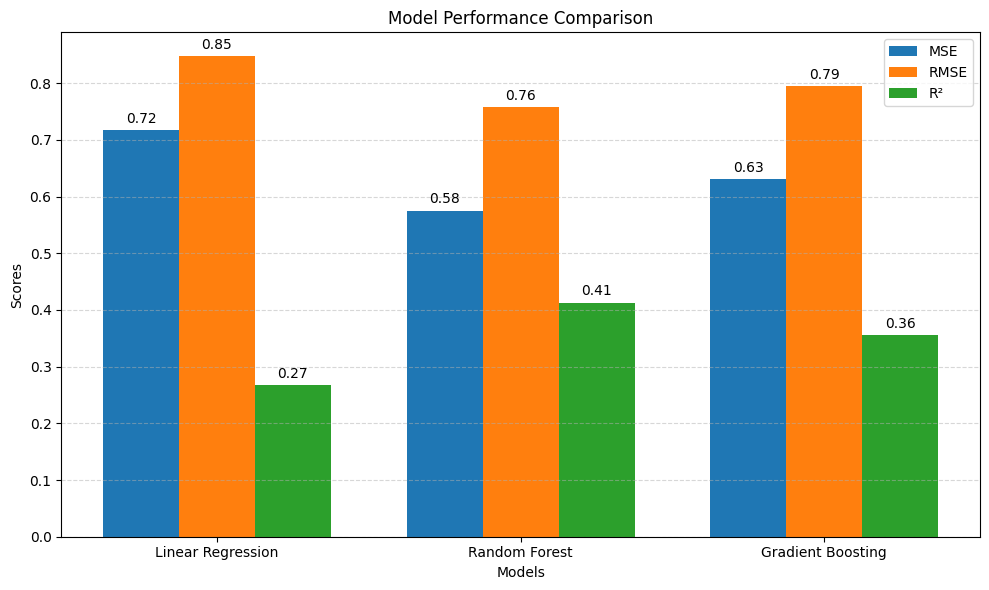

In [54]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse = [0.7177, 0.5751, 0.6311]
rmse = [0.8472, 0.7584, 0.7944]
r2 = [0.2671, 0.4128, 0.3556]

x = np.arange(len(models))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width, mse, width=bar_width, label='MSE')
bars2 = ax.bar(x, rmse, width=bar_width, label='RMSE')
bars3 = ax.bar(x + bar_width, r2, width=bar_width, label='R²')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## CONFUSION MATRIX HEATMAP

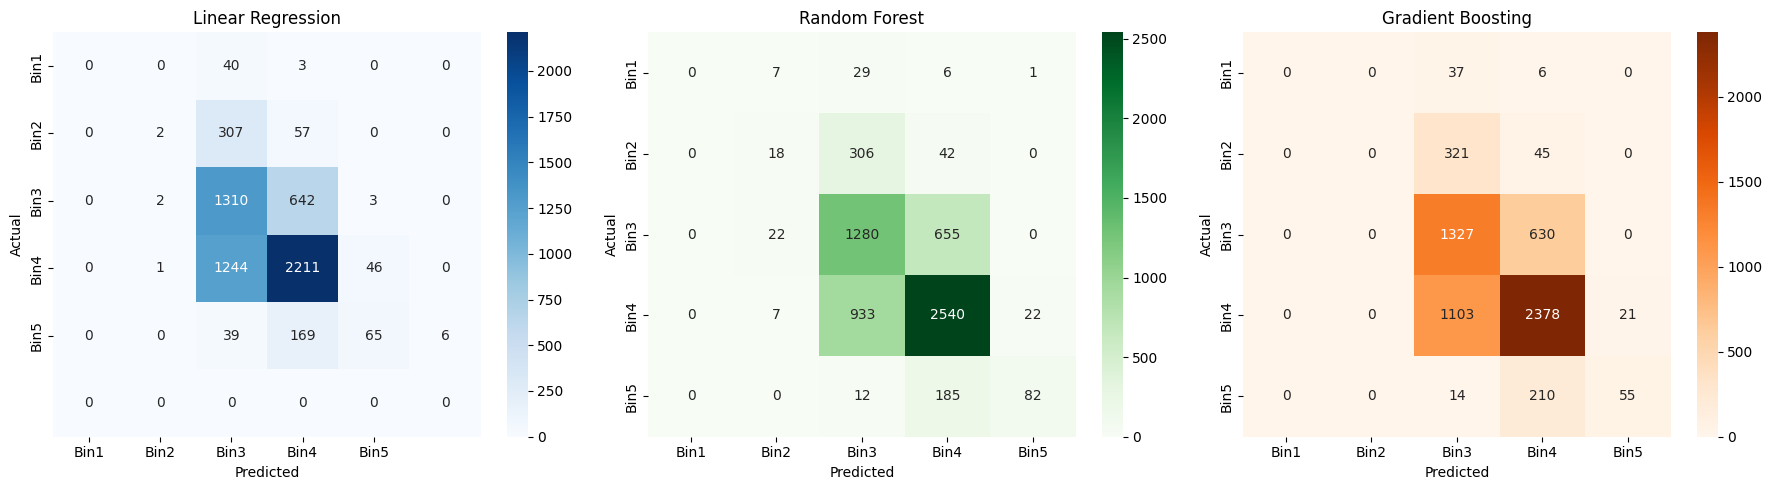

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define bins for avg_vote (e.g., 5 bins: very low, low, medium, high, very high)
n_bins = 5
bins = np.linspace(y.min(), y.max(), n_bins + 1)
labels = [f'Bin{i+1}' for i in range(n_bins)]

y_test_binned = np.digitize(y_test, bins) - 1

# Linear Regression
y_pred_binned = np.digitize(y_pred, bins) - 1
cm_lr = confusion_matrix(y_test_binned, y_pred_binned)

# Random Forest
y_pred_rf_binned = np.digitize(y_pred_rf, bins) - 1
cm_rf = confusion_matrix(y_test_binned, y_pred_rf_binned)

# Gradient Boosting
y_pred_gbr_binned = np.digitize(y_pred_gbr, bins) - 1
cm_gbr = confusion_matrix(y_test_binned, y_pred_gbr_binned)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_gbr, annot=True, fmt='d', cmap='Oranges', ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title('Gradient Boosting')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## DATADISTRIBUTION HISTOGRAM

### BEFORE

<Figure size 1800x1200 with 0 Axes>

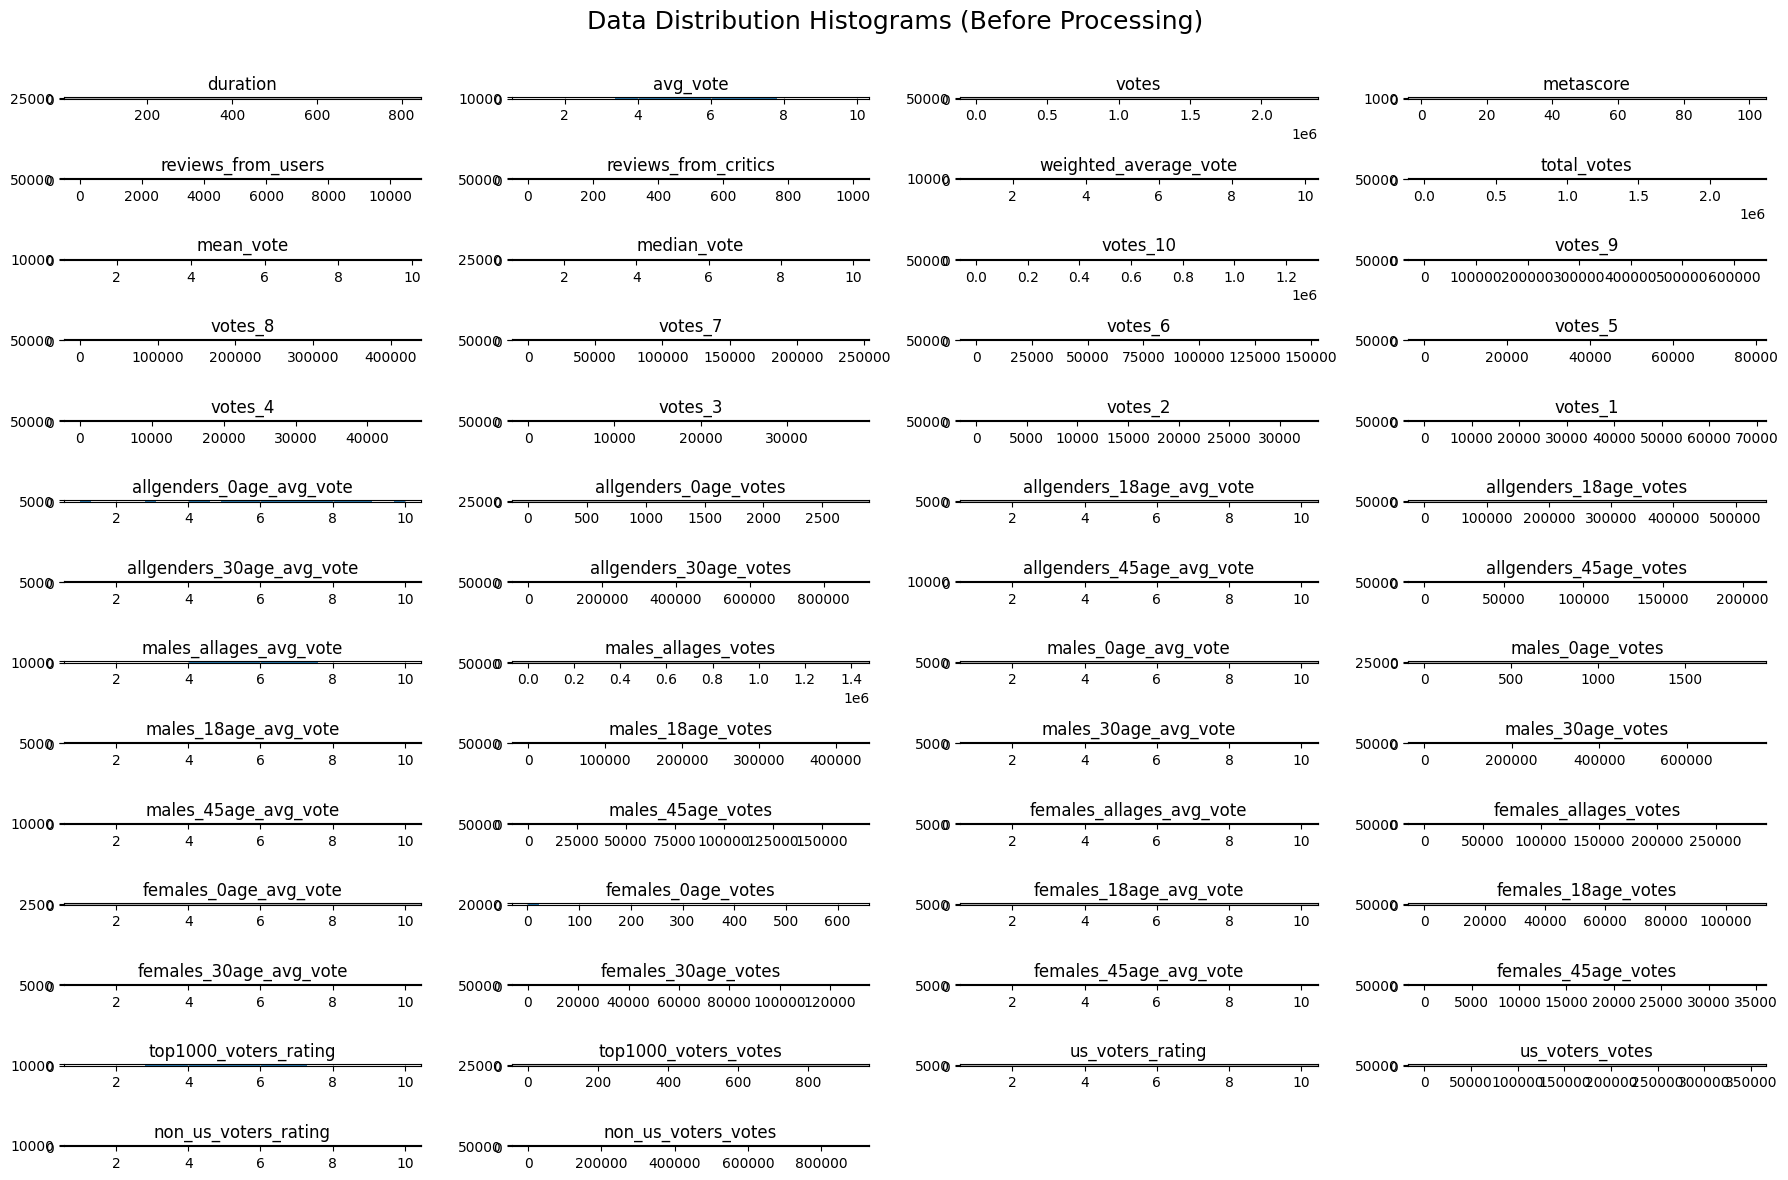

In [56]:
raw_numerical_cols = merged_backup.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 12))
merged_backup[raw_numerical_cols].hist(bins=30, figsize=(18, 12), layout=(int(np.ceil(len(raw_numerical_cols)/4)), 4))
plt.suptitle("Data Distribution Histograms (Before Processing)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### After


<Figure size 1800x1200 with 0 Axes>

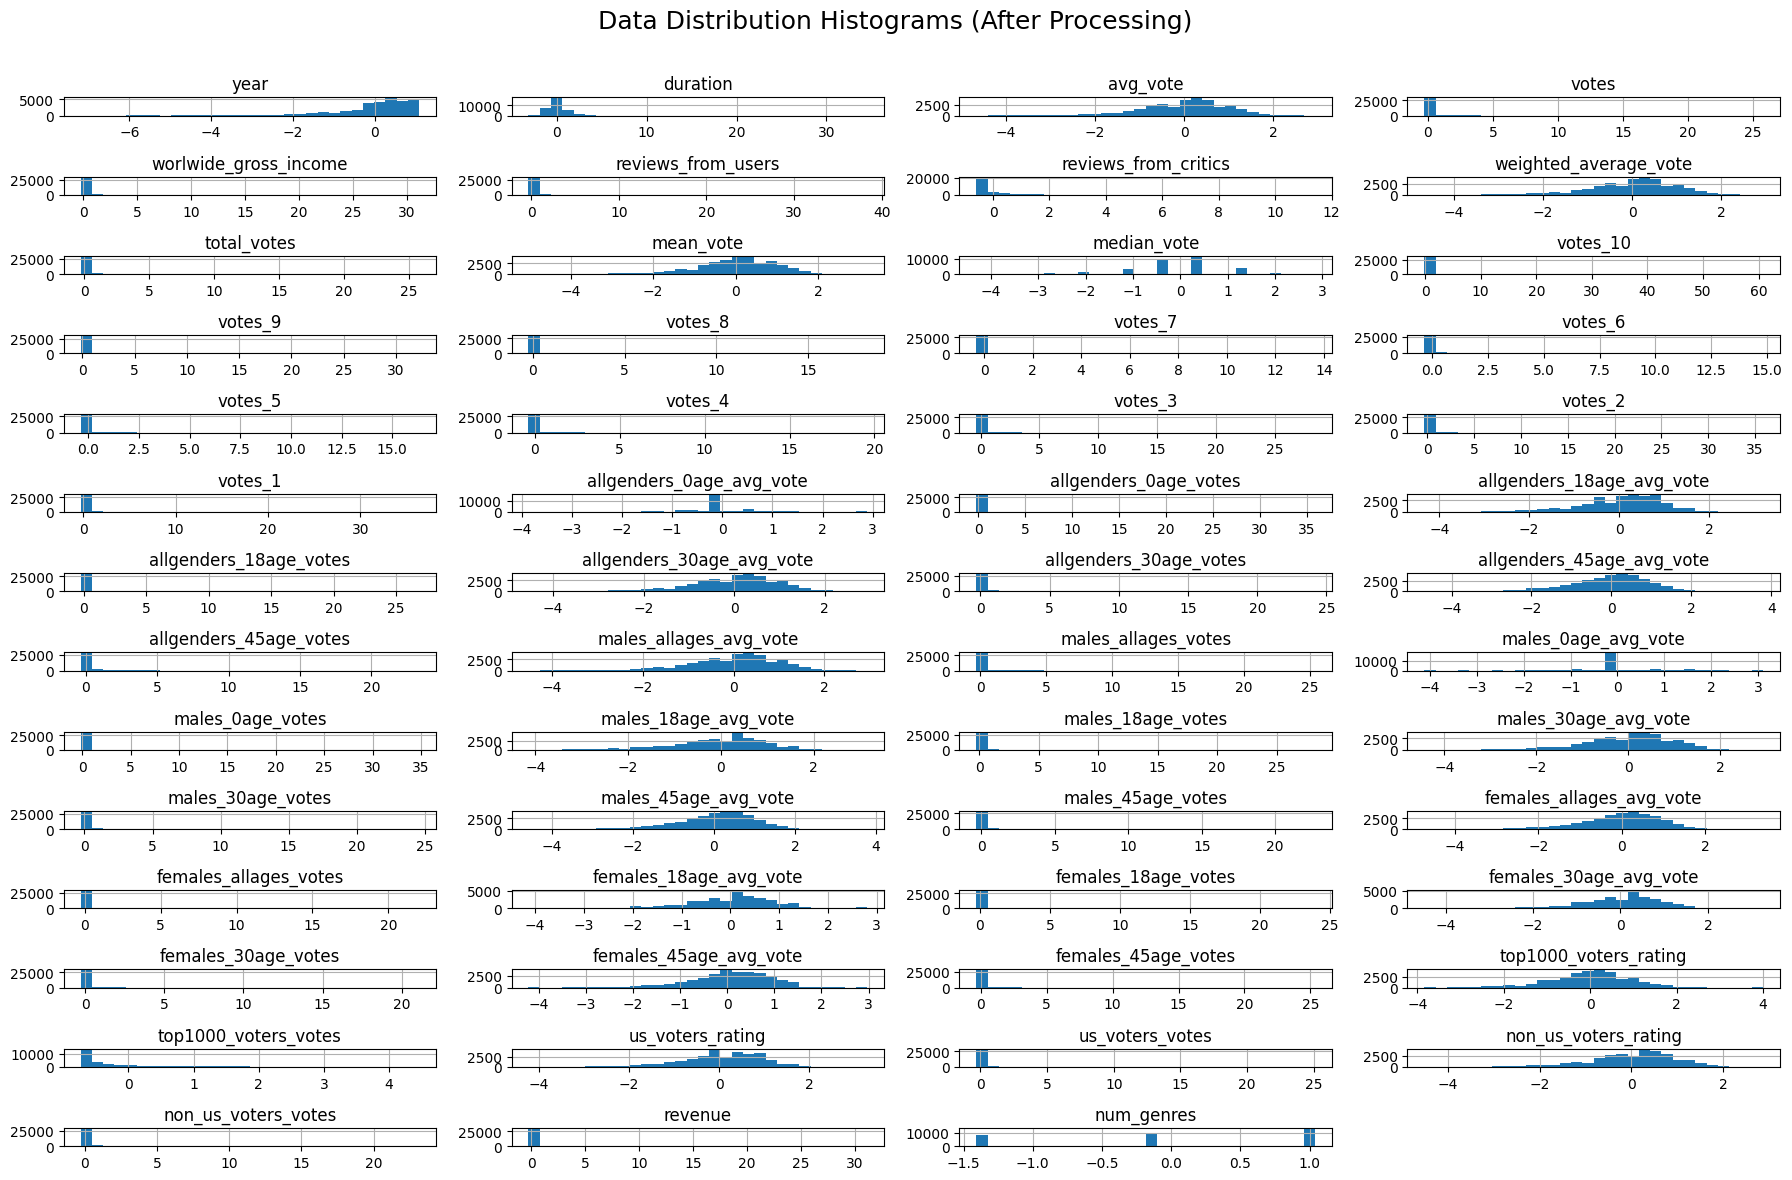

In [57]:
plt.figure(figsize=(18, 12))
scaled_df.hist(bins=30, figsize=(18, 12), layout=(int(np.ceil(len(raw_numerical_cols)/4)), 4))
plt.suptitle("Data Distribution Histograms (After Processing)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## PROCESSING TIME COMPARISON

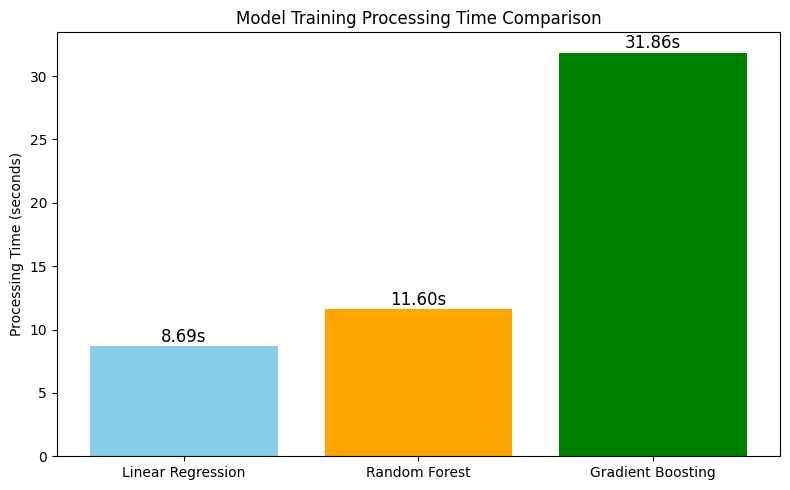

In [58]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

start = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_time = time.time() - start

start = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_time = time.time() - start

start = time.time()
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_time = time.time() - start

plt.figure(figsize=(8, 5))
plt.bar(['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    [lr_time, rf_time, gbr_time], color=['skyblue', 'orange', 'green'])
plt.ylabel('Processing Time (seconds)')
plt.title('Model Training Processing Time Comparison')
for i, v in enumerate([lr_time, rf_time, gbr_time]):
    plt.text(i, v + 0.01, f"{v:.2f}s", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

